# Lesson-2

### Библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

plt.rcParams["figure.figsize"] = (10,5)

### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
data = datasets.make_regression(n_features = 10, random_state = 42)
X = np.array(data[0])
y = np.array(data[1])

Добавим единичный стобец для нахождения intercept:

In [3]:
X = np.column_stack(([1 for _ in range(X.shape[0])], np.array(data[0])))

Средняя квадратическая ошибка линейной регресси:

In [4]:
def lin_reg_mse(y, y_pred):
    loss = np.mean((y - y_pred)**2)
    return loss

Коэфициенты линейной регресси через КЛАССИЧЕСКИЙ градиентный спуск:

In [5]:
def lin_reg_grad_basic(X, y, n = 1000, a = 1): #Коэфициенты линейной регресси
    loss_basic = []
    sqr_w_basic = []
    abs_w_basic = []
    w = np.array([1. for _ in range(X.shape[1])]).T
    for i in range(n + 1):
        y_pred = X @ w
        w -= a * 2/y.shape[0] * X.T @ (y_pred - y)
        loss = lin_reg_mse(y, y_pred)
        sqr_w = w.T @ w
        abs_w = np.sum(np.abs(w))
        loss_basic.append(loss)
        sqr_w_basic.append(sqr_w)
        abs_w_basic.append(abs_w)
        if i % (n / 10) == 0:
            print(i, loss, sqr_w, abs_w)
    return w, loss_basic, sqr_w_basic, abs_w_basic

In [6]:
w, loss_basic, sqr_w_basic, abs_w_basic = lin_reg_grad_basic(X, y, 250, 0.5)
print(w)

0 35622.915882528185 43755.080612652484 587.6419060923618
25 4.4729121563381894e-09 33776.83519018837 475.6051804000137
50 1.7946705769794952e-21 33776.84089501428 475.6052051843025
75 5.3052473597923485e-28 33776.84089501117 475.6052051842885
100 6.173625444259639e-28 33776.84089501117 475.6052051842885
125 5.951482213349402e-28 33776.84089501117 475.6052051842885
150 6.25440480095427e-28 33776.84089501117 475.6052051842885
175 6.047407699424277e-28 33776.84089501117 475.6052051842885
200 5.879538098793246e-28 33776.84089501117 475.6052051842885
225 5.855556727274526e-28 33776.84089501117 475.6052051842885
250 6.047407699424277e-28 33776.84089501117 475.6052051842885
[4.19505240e-15 9.36212246e+01 7.09060519e+01 3.15861448e+00
 6.36430250e+01 8.70969124e+01 1.04567840e+01 7.06475726e+01
 1.67482582e+01 5.19712837e+00 5.41296335e+01]


Коэфициенты линейной регресси через СТОХАСТИЧЕСКИЙ градиентный спуск:

In [7]:
def lin_reg_grad_stochastic(X, y, n = 1000, a = 1):
    loss_stochastic = []
    sqr_w_stochastic = []
    abs_w_stochastic = []
    w = np.array([1. for _ in range(X.shape[1])]).T
    for i in range(n + 1):
        for j in range(X.shape[0]):
            y_pred = X[j] @ w
            w -= a * 2/y.shape[0] * X[j].T * (y_pred - y[j])
        loss = lin_reg_mse(y, X @ w)
        sqr_w = w.T @ w
        abs_w = np.sum(np.abs(w))
        loss_stochastic.append(loss)
        sqr_w_stochastic.append(sqr_w)
        abs_w_stochastic.append(abs_w)
        if i % (n / 10) == 0:
            print(i, loss, sqr_w, abs_w)
    return w, loss_stochastic, sqr_w_stochastic, abs_w_stochastic

In [8]:
w, loss_stochastic, sqr_w_stochastic, abs_w_stochastic = lin_reg_grad_stochastic(X, y, 250, 0.5)
print(w)

0 3600.9059784581027 15770.439392782253 344.7610586067282
25 1.4093350450696725e-08 33776.821981326124 475.60501788455935
50 3.234297493169678e-19 33776.84089492101 475.60520518338944
75 2.3619505244275775e-26 33776.84089501113 475.60520518428825
100 2.176864823401003e-26 33776.84089501115 475.60520518428825
125 2.176864823401003e-26 33776.84089501115 475.60520518428825
150 2.176864823401003e-26 33776.84089501115 475.60520518428825
175 2.176864823401003e-26 33776.84089501115 475.60520518428825
200 2.176864823401003e-26 33776.84089501115 475.60520518428825
225 2.176864823401003e-26 33776.84089501115 475.60520518428825
250 2.176864823401003e-26 33776.84089501115 475.60520518428825
[-3.26575801e-15  9.36212246e+01  7.09060519e+01  3.15861448e+00
  6.36430250e+01  8.70969124e+01  1.04567840e+01  7.06475726e+01
  1.67482582e+01  5.19712837e+00  5.41296335e+01]


Визуализируем сходимость 2-ух методов:

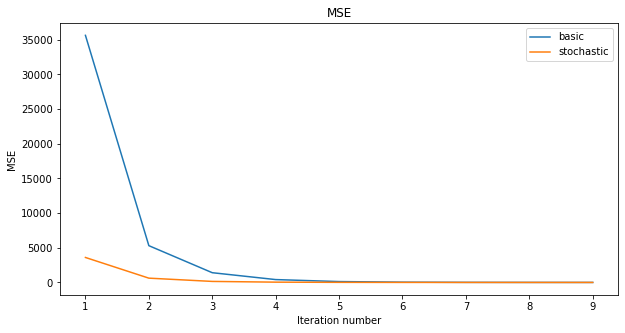

In [9]:
n = 9
n_iteration = [i+1 for i in range(n)]
plt.plot(n_iteration, loss_basic[:n], label = "basic")
plt.plot(n_iteration, loss_stochastic[:n], label = "stochastic")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Вывод:

Стохастический градиентный спуск сходится быстрее классического градиентного спуска.

### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

Средняя квадратическая ошибка линейной регресси с L2-регуляризацией:

In [10]:
def lin_reg_mse_L2(y, y_pred, w, l):
    loss = np.mean((y - y_pred)**2) + l * w.T @ w
    return loss

Коэфициенты линейной регресси через КЛАССИЧЕСКИЙ градиентный спуск c L2-регуляризацией:

In [11]:
def lin_reg_grad_basic_L2(X, y, n = 1000, a = 1, l = 0.001):
    loss_basic_L2 = []
    sqr_w_basic_L2 = []
    w = np.array([1. for _ in range(X.shape[1])]).T
    for i in range(n + 1):
        y_pred = X @ w
        w -= 2*a * (X.T @ (y_pred - y)/y.shape[0] + l * w)
        loss = lin_reg_mse(y, y_pred)
        sqr_w = w.T @ w
        loss_basic_L2.append(loss)
        sqr_w_basic_L2.append(sqr_w)
        if i % (n / 10) == 0:
            print(i, loss, sqr_w)
    return w, loss_basic, sqr_w_basic_L2

In [12]:
w, loss_basic_L2, sqr_w_basic_L2 = lin_reg_grad_basic_L2(X, y, 700, 0.01, 0.4)
print(w)

0 35622.915882528185 47.88614452176554
70 4632.409194345724 13592.798922769281
140 2953.4518206498255 16749.29183275303
210 2734.2362258136504 17252.95739167257
280 2695.717929640459 17345.38460584607
350 2687.728871500957 17364.81580062535
420 2685.8712922181753 17369.357709225606
490 2685.403031953905 17370.50528509775
560 2685.278256316844 17370.81141232651
630 2685.2437629588794 17370.896087146724
700 2685.23399862355 17370.920064336548
[ 1.48715357 62.83609033 46.96835656  5.63313571 46.60583861 63.02068336
 -2.4079008  57.12266314 15.04346537  2.62030988 39.20326806]


Коэфициенты линейной регресси через СТОХАСТИЧЕСКИЙ градиентный спуск c L2-регуляризацией:

In [13]:
def lin_reg_grad_stochastic_L2(X, y, n = 1000, a = 1, l = 0.001):
    loss_stochastic_L2 = []
    sqr_w_stochastic_L2 = []
    w = np.array([1. for _ in range(X.shape[1])]).T
    for i in range(n + 1):
        for j in range(X.shape[0]):
            y_pred = X[j] @ w
            w -= 2*a/y.shape[0] * (X[j].T * (y_pred - y[j]) + l * w)
        loss = lin_reg_mse(y, X @ w)
        sqr_w = w.T @ w
        loss_stochastic_L2.append(loss)
        sqr_w_stochastic_L2.append(sqr_w)
        if i % (n / 10) == 0:
            print(i, loss, sqr_w)
    return w, loss_stochastic, sqr_w_stochastic_L2

In [14]:
w, loss_stochastic_L2, sqr_w_stochastic_L2 = lin_reg_grad_stochastic_L2(X, y, 700, 0.01, 0.4)
print(w)

0 33968.5989513626 47.08248377044143
70 4624.970821541521 13501.741542198557
140 2953.23892489312 16733.995133295208
210 2730.5659931765495 17259.321150623102
280 2690.9542764213966 17356.74977151667
350 2682.666318520343 17377.377444149963
420 2680.7257150003006 17382.22608024653
490 2680.2333699971823 17383.457737889647
560 2680.1013060652763 17383.788218742444
630 2680.0645362100568 17383.8802355608
700 2680.0540466146167 17383.90648454293
[ 1.47355741 62.87194043 47.00440108  5.57836612 46.59413663 63.02518997
 -2.42050919 57.13247989 15.0469835   2.62744007 39.26626942]


Визуализируем сходимость 2-ух методов c L2-регуляризацией:

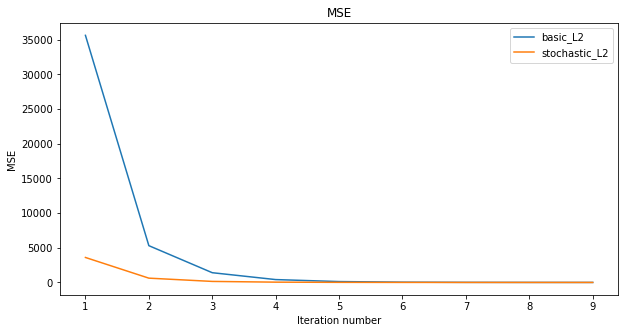

In [15]:
n = 9
n_iteration = [i+1 for i in range(n)]
plt.plot(n_iteration, loss_basic_L2[:n], label = "basic_L2")
plt.plot(n_iteration, loss_stochastic_L2[:n], label = "stochastic_L2")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()

Визуализируем изменение суммы квадратов параметров методов с L2-регуляризацией и без:

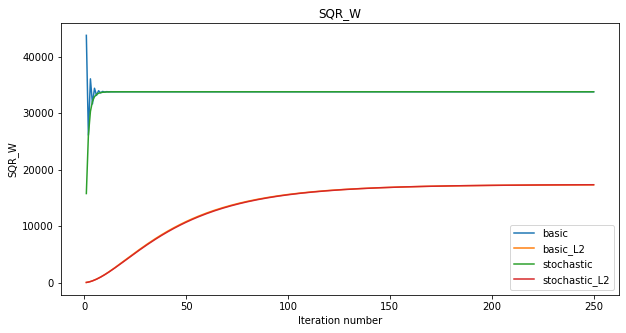

In [16]:
n = 250
n_iteration = [i+1 for i in range(n)]
plt.plot(n_iteration, sqr_w_basic[:n], label = "basic")
plt.plot(n_iteration, sqr_w_basic_L2[:n], label = "basic_L2")
plt.plot(n_iteration, sqr_w_stochastic[:n], label = "stochastic")
plt.plot(n_iteration, sqr_w_stochastic_L2[:n], label = "stochastic_L2")
plt.title('SQR_W')
plt.xlabel('Iteration number')
plt.ylabel('SQR_W')
plt.legend()
plt.show()

##### Графики basic_L2 и stochastic_L2 практически совпадают

### 3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

Средняя квадратическая ошибка линейной регресси с L1-регуляризацией:

In [17]:
def lin_reg_mse_L1(y, y_pred, w, l):
    loss = np.mean((y - y_pred)**2) + l * np.sum(np.abs(w))
    return loss

Коэфициенты линейной регресси через КЛАССИЧЕСКИЙ градиентный спуск c L1-регуляризацией:

In [18]:
def lin_reg_grad_basic_L1(X, y, n = 1000, a = 1, l = 0.001):
    loss_basic_L1 = []
    abs_w_basic_L1 = []
    w = np.array([1. for _ in range(X.shape[1])]).T
    for i in range(n + 1):
        y_pred = X @ w
        w -= a * (2/y.shape[0] * X.T @ (y_pred - y) + l * np.sign(w))
        loss = lin_reg_mse(y, y_pred)
        abs_w = np.sum(np.abs(w))
        loss_basic_L1.append(loss)
        abs_w_basic_L1.append(abs_w)
        if i % (n / 10) == 0:
            print(i, loss, abs_w)
    return w, loss_basic, abs_w_basic_L1

In [19]:
w, loss_basic_L1, abs_w_basic_L1 = lin_reg_grad_basic_L1(X, y, 700, 0.01, 40)
print(w)

0 35622.915882528185 16.972838121847236
70 6186.180568220543 262.20682781035634
140 3296.673199102119 311.77363050282855
210 2754.1181717510212 323.26142414311397
280 2620.6254704735115 326.40776078989825
350 2606.0527045076155 327.2576241101824
420 2582.7664244397765 327.9648104405516
490 2591.266030611014 327.6104303378846
560 2577.895188713717 327.93045754284475
630 2590.5248511931354 327.3680001924237
700 2580.0100300316767 327.76261710471334
[-0.20825456 70.47937301 48.36767311 -0.14617004 46.15709734 69.17383377
 -0.27847894 58.46765619  0.41578612  0.24729891 33.82099511]


Коэфициенты линейной регресси через СТОХАСТИЧЕСКИЙ градиентный спуск c L1-регуляризацией:

In [20]:
def lin_reg_grad_stochastic_L1(X, y, n = 1000, a = 1, l = 0.001):
    loss_stochastic_L1 = []
    abs_w_stochastic_L1 = []
    w = np.array([1. for _ in range(X.shape[1])]).T
    for i in range(n + 1):
        for j in range(X.shape[0]):
            y_pred = X[j] @ w
            w -= a/y.shape[0] * (2 * X[j].T * (y_pred - y[j]) + l * np.sign(w))
        loss = lin_reg_mse(y, X @ w)
        abs_w = np.sum(np.abs(w))
        loss_stochastic_L1.append(loss)
        abs_w_stochastic_L1.append(abs_w)
        if i % (n / 10) == 0:
            print(i, loss, abs_w)
    return w, loss_stochastic, abs_w_stochastic_L1

In [21]:
w, loss_stochastic_L1, abs_w_stochastic_L1 = lin_reg_grad_stochastic_L1(X, y, 700, 0.01, 40)
print(w)

0 34353.361978634624 16.7550394301566
70 6157.9172020055 260.678705247405
140 3300.11599699802 310.60400924714895
210 2770.283016850513 322.31034821614014
280 2635.9376288258786 325.5428122664881
350 2599.86215701089 326.4364491954385
420 2589.042379592321 326.7100550106408
490 2585.8172262560834 326.78990098184687
560 2584.832712434161 326.81817958393947
630 2584.332613331968 326.81871841713274
700 2584.1972857283745 326.82540077575476
[-1.23767142e-02  7.05507054e+01  4.84453547e+01  4.47190560e-04
  4.62002440e+01  6.91774153e+01  2.12983342e-02  5.84395774e+01
  4.86251971e-02  1.02830559e-02  3.39190734e+01]


Визуализируем сходимость 2-ух методов c L1-регуляризацией:

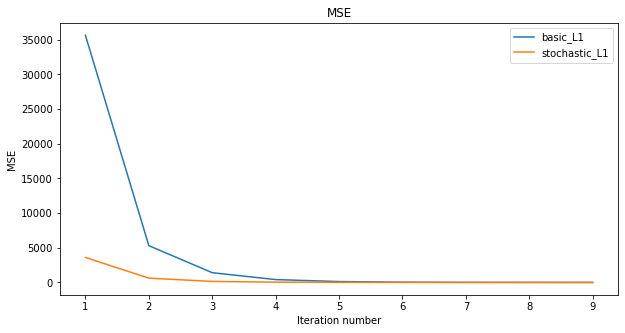

In [22]:
n = 9
n_iteration = [i+1 for i in range(n)]
plt.plot(n_iteration, loss_basic_L1[:n], label = "basic_L1")
plt.plot(n_iteration, loss_stochastic_L1[:n], label = "stochastic_L1")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()

Визуализируем изменение суммы квадратов параметров методов с L1-регуляризацией и без:

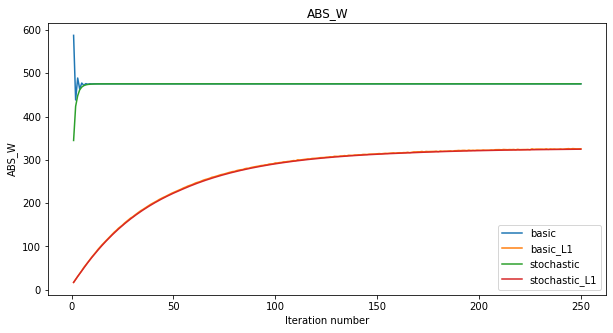

In [23]:
n = 250
n_iteration = [i+1 for i in range(n)]
plt.plot(n_iteration, abs_w_basic[:n], label = "basic")
plt.plot(n_iteration, abs_w_basic_L1[:n], label = "basic_L1")
plt.plot(n_iteration, abs_w_stochastic[:n], label = "stochastic")
plt.plot(n_iteration, abs_w_stochastic_L1[:n], label = "stochastic_L1")
plt.title('ABS_W')
plt.xlabel('Iteration number')
plt.ylabel('ABS_W')
plt.legend()
plt.show()

##### Графики basic_L1 и stochastic_L1 практически совпадают